In [3]:
import pandas as pd
import numpy as np

In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [15]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 28s 0us/step


In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
import matplotlib.pyplot as plt

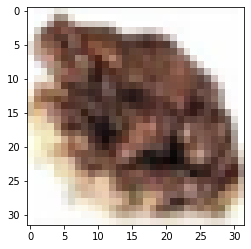

In [18]:
plt.imshow(x_train[125])

In [19]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [20]:
x_train.max()

255

In [21]:
x_train = x_train/225

In [22]:
x_test = x_test/255

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train_cat = to_categorical(y_train,10)

In [25]:
y_test_cat = to_categorical(y_test,10)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [32]:
model.fit(x_train,y_train_cat,epochs=15,validation_data=(x_test,y_test_cat),callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 29s 585us/sample - loss: 1.5251 - accuracy: 0.4540 - val_loss: 1.3422 - val_accuracy: 0.5225
Epoch 2/15
50000/50000 [==============================] - 28s 560us/sample - loss: 1.1829 - accuracy: 0.5862 - val_loss: 1.1670 - val_accuracy: 0.5799
Epoch 3/15
50000/50000 [==============================] - 29s 573us/sample - loss: 1.0305 - accuracy: 0.6416 - val_loss: 1.0845 - val_accuracy: 0.6220
Epoch 4/15
50000/50000 [==============================] - 28s 569us/sample - loss: 0.9316 - accuracy: 0.6763 - val_loss: 1.0349 - val_accuracy: 0.6481
Epoch 5/15
50000/50000 [==============================] - 29s 571us/sample - loss: 0.8515 - accuracy: 0.7085 - val_loss: 0.9976 - val_accuracy: 0.6668
Epoch 6/15
50000/50000 [==============================] - 29s 576us/sample - loss: 0.7937 - accuracy: 0.7295 - val_loss: 1.0873 - val_accuracy: 0.6480
Epoch 7/15
50000/50000 [====================

In [33]:
model.save('cifar.h5')

In [34]:
losses = pd.DataFrame(model.history.history)

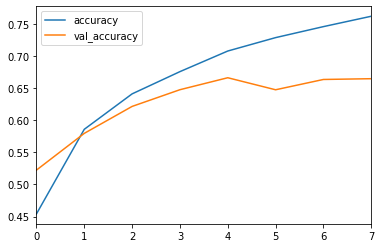

In [35]:
losses[['accuracy','val_accuracy']].plot()

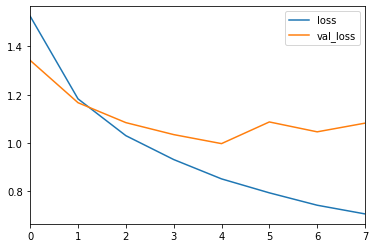

In [36]:
losses[['loss','val_loss']].plot()

In [38]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test_cat,verbose=0))

['loss', 'accuracy']
[1.0823333633422851, 0.6653]


In [39]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1000
           1       0.78      0.80      0.79      1000
           2       0.62      0.56      0.59      1000
           3       0.51      0.46      0.49      1000
           4       0.62      0.66      0.64      1000
           5       0.55      0.60      0.58      1000
           6       0.91      0.53      0.67      1000
           7       0.62      0.81      0.71      1000
           8       0.64      0.84      0.73      1000
           9       0.80      0.71      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000



array([[685,  22,  40,  21,  22,   9,   0,  18, 151,  32],
       [ 27, 802,   9,  12,   4,   6,   3,   8,  62,  67],
       [ 61,  10, 558,  59,  90,  83,  18,  71,  37,  13],
       [ 19,  19,  60, 462,  85, 209,  11,  82,  34,  19],
       [ 18,  10,  64,  48, 655,  44,   7, 127,  23,   4],
       [  9,  10,  44, 133,  50, 599,   9, 114,  24,   8],
       [  8,  22,  84, 112,  99,  60, 528,  32,  41,  14],
       [ 16,   7,  22,  26,  42,  49,   1, 814,  12,  11],
       [ 65,  31,   8,  14,   8,   9,   0,   9, 842,  14],
       [ 38,  95,  10,  13,   5,  15,   4,  31,  81, 708]], dtype=int64)